[Reference](https://pub.aimind.so/dbscan-clustering-with-python-and-scikit-learn-25d32d6cf7c4)

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Configuration options
num_samples_total = 1000
cluster_centers = [(3,3), (7,7)]
num_classes = len(cluster_centers)
epsilon = 1
.0
min_samples = 13

# Generate data
X, y = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 0.5)

In [3]:
np.save('./clusters.npy', X)
X = np.load('./clusters.npy')

In [4]:
# Compute DBSCAN
db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(X)
labels = db.labels_

In [5]:
no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 2
Estimated no. of noise points: 0


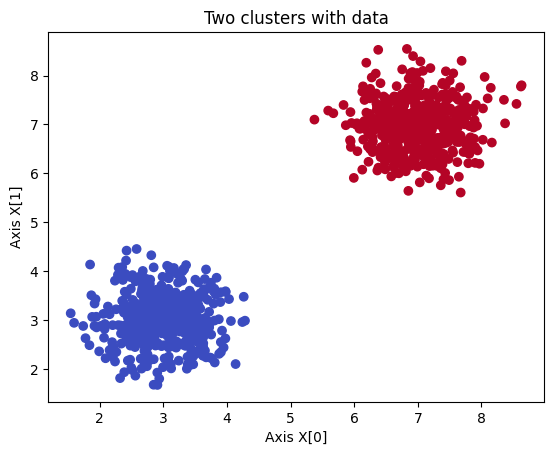

In [6]:
# Generate scatter plot for training data
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', labels))
plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
plt.title('Two clusters with data')
plt.xlabel('Axis X[0]')
plt.ylabel('Axis X[1]')
plt.show()

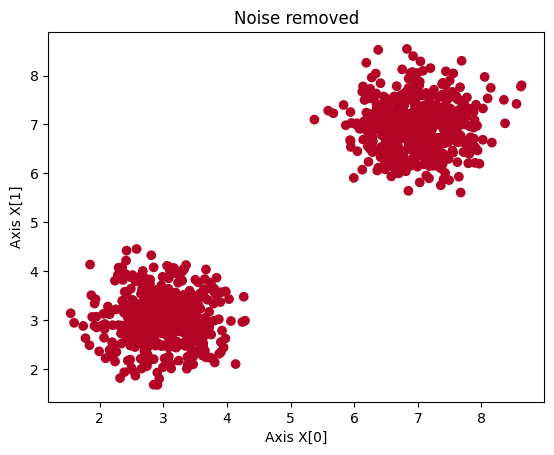

In [7]:
# Remove the noise
range_max = len(X)
X = np.array([X[i] for i in range(0, range_max) if labels[i] != -1])
labels = np.array([labels[i] for i in range(0, range_max) if labels[i] != -1])

# Generate scatter plot for training data
colors = list(map(lambda x: '#000000' if x == -1 else '#b40426', labels))
plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
plt.title(f'Noise removed')
plt.xlabel('Axis X[0]')
plt.ylabel('Axis X[1]')
plt.show()